<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EDO2doOrdenDifFinitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Tx0=50 #temperatura del extremo izquierdo x0
Txn=200 #temperatura del extremo derecho xn
Ta=25 #temperatura ambiente
alfa=0.02 #factor de dispersion de calor
L=10 #longitud de la barra
n=21 #numero de nodos incluyendo el nodo inicial
h=L/(n-1) #tamano del incrmento

In [ ]:
barra=np.linspace(0,L,n) #longitud de la barra con n nodos
barra

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [ ]:
A=np.zeros((n-2,n-2))
b=np.zeros(n-2)
for i in range(n-2):
  if i==0: #primer renglon de la matriz A y del vector b
    A[i,i]=alfa+2/h**2
    A[i,i+1]=-1/h**2
    b[i]=Tx0/h**2+alfa*Ta
  elif i==n-3: #ultimo renglon de la matriz A y del vector b
    A[i,i]=alfa+2/h**2
    A[i,i-1]=-1/h**2
    b[i]=Txn/h**2+alfa*Ta
  else: #renglones intermedios
    A[i,i-1]=-1/h**2
    A[i,i]=alfa+2/h**2
    A[i,i+1]=-1/h**2
    b[i]=alfa*Ta


In [ ]:
Txi=np.linalg.solve(A,b)
Txi

array([ 54.4721716 ,  59.09170406,  63.88169503,  68.86609449,
        74.06982441,  79.51890346,  85.24057702,  91.26345347,
        97.61764719, 104.33492914, 111.44888574, 118.99508676,
       127.01126322, 135.537496  , 144.61641626, 154.2934186 ,
       164.61688803, 175.6384419 , 187.41318798])

In [ ]:
T=np.concatenate(([Tx0],Txi,[Txn]))
T

array([ 50.        ,  54.4721716 ,  59.09170406,  63.88169503,
        68.86609449,  74.06982441,  79.51890346,  85.24057702,
        91.26345347,  97.61764719, 104.33492914, 111.44888574,
       118.99508676, 127.01126322, 135.537496  , 144.61641626,
       154.2934186 , 164.61688803, 175.6384419 , 187.41318798,
       200.        ])

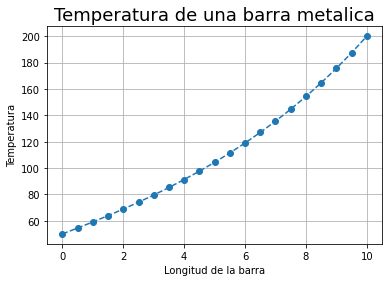

In [ ]:
plt.plot(barra,T,'o--')
plt.xlabel('Longitud de la barra')
plt.ylabel('Temperatura')
plt.title('Temperatura de una barra metalica',fontsize=18)
plt.grid()
plt.show()